# Assignment 2: recommender System 
# By Christian Wegert

## Code from the lecture (Defines)

In [1]:
#read data to DataFrames
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('../../DATA/movielens100k/u.user', sep='|', names=u_cols, encoding = "ISO-8859-1")

r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('../../DATA/movielens100k/u.data', sep='\t', names=r_cols, encoding = "ISO-8859-1")

m_cols=['movie_id', 'title', 'release date', 'video release date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('../../DATA/movielens100k/u.item', sep='|', names=m_cols ,encoding = "ISO-8859-1" )

In [2]:
#gerate matrix (this can be done more efficiently!)
R=np.zeros((np.shape(users)[0],np.shape(movies)[0]))
for i in range(np.shape(ratings)[0]):
    R[ratings['user_id'][i]-1, ratings['movie_id'][i]-1]=ratings['rating'][i]

In [3]:
epsilon=0.0000001 
def CosineDist(a,b):
    return a.dot(b)/(np.linalg.norm(a)*np.linalg.norm(b)+epsilon) #added epsilon for numerical stability: avoiding div by zero -> NaN

In [4]:
#new function to compute eucledian Distance'
def EucledianDist(a,b):
    return np.sqrt(np.sum(np.square(a - b)))

In [5]:
def getTopN(movie_id, D, N=5):
    return D[movie_id,:].argsort()[-N:]

def getIDbyName(name):
    if np.size(movies.movie_id[movies.title.str.contains(name)]) > 0:
        m = int(movies.movie_id[movies.title.str.contains(name)][:1]), str(movies.title[movies.title.str.contains(name)][:1])
        return m[0]-1
    else:
        return -1
    
def getNameByID(IDs):
    res=movies.iloc[IDs]
    return res.title

def CII(title, D):
    if getIDbyName(title) > 0:
        print ("recommending movies for: '" + str(getNameByID(getIDbyName(title)))+"'")
        return getNameByID(getTopN(getIDbyName(title),D))[::-1]
    else:
        print ("no movie title containing " + str(title) + "found...")
        
def Score_byID(ID, D, Test):
    #print ("Hit Scores for: ", getNameByID(ID))
    res_id = getTopN(ID,D)[::-1]
    res_title = getNameByID(getTopN(ID,D))[::-1]
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)
    
#compute scores for all test users
def test_Score(D_train, R_test):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID(e,D_train, R_test[i])
            userScore+=av_score
        userScores.append(userScore/(5))
    return userScores

## 4.1 Alternative Distance Measures
Implement a different distance measure, e.g. eucledian and compare the ressults.

## Test Cosinus-Distance

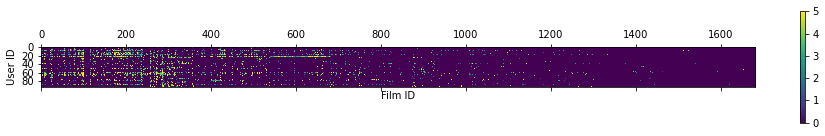

In [6]:
#split into train and test data
from sklearn.model_selection import train_test_split
R_train, R_test = train_test_split(R, test_size=0.1)
plt.matshow(R_test)
plt.xlabel('Film ID')
plt.ylabel('User ID')
plt.colorbar()

In [7]:
#cosinus distance
#again, implementation not efficient: better use lamda opperators (later in this course)
D_train=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            D_train[i,j]=CosineDist(R_train[:,i],R_train[:,j])

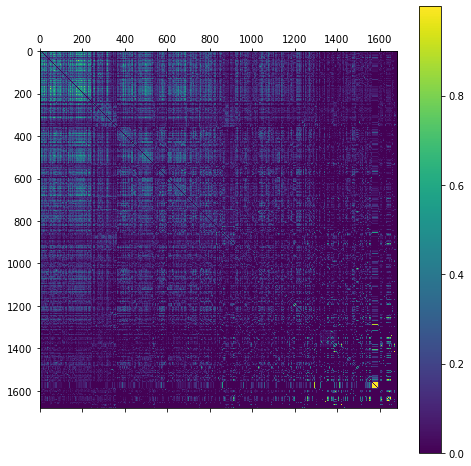

In [8]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.matshow(D_train)
plt.colorbar() 

In [9]:
def Score_byID(ID, D, Test):
    #print ("Hit Scores for: ", getNameByID(ID))
    res_id = getTopN(ID,D)[::-1]
    res_title = getNameByID(getTopN(ID,D))[::-1]
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)
    

In [10]:
#compute scores for all test users
def test_Score(D_train, R_test):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID(e,D_train, R_test[i])
            userScore+=av_score
        userScores.append(userScore/(5))
    return userScores

In [11]:
test_res=test_Score(D_train,R_test)

(array([ 3., 16.,  9., 15., 16., 14.,  9.,  6.,  4.,  3.]),
 array([0.44 , 0.852, 1.264, 1.676, 2.088, 2.5  , 2.912, 3.324, 3.736,
        4.148, 4.56 ]),
 <BarContainer object of 10 artists>)

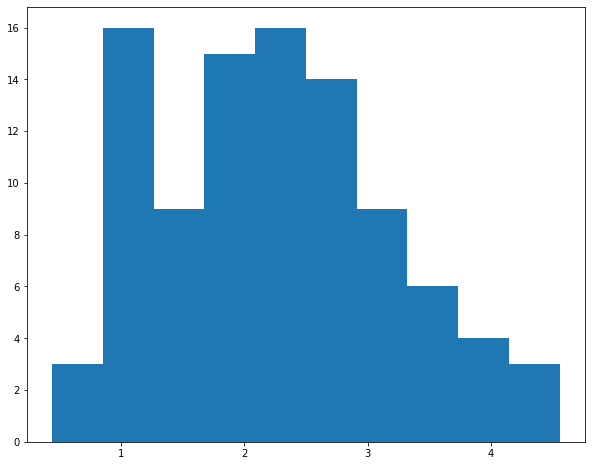

In [12]:
plt.hist(test_res)

In [13]:
np.mean(test_res)

2.2357894736842105

## Test Eucledian-Distance

In [14]:
#Eucledian Distance
#again, implementation not efficient: better use lamda opperators (later in this course)
D_train=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            D_train[i,j]=EucledianDist(R[:,i],R[:,j])

In [15]:
def Score_byID(ID, D, Test):
    #print ("Hit Scores for: ", getNameByID(ID))
    res_id = getTopN(ID,D)[::-1]
    res_title = getNameByID(getTopN(ID,D))[::-1]
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)
    

In [16]:
#compute scores for all test users
def test_Score(D_train, R_test):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID(e,D_train, R_test[i])
            userScore+=av_score
        userScores.append(userScore/(5))
    return userScores

In [17]:
test_res=test_Score(D_train,R_test)

(array([23.,  5., 13.,  8., 16., 11.,  8.,  5.,  4.,  2.]),
 array([0.  , 0.44, 0.88, 1.32, 1.76, 2.2 , 2.64, 3.08, 3.52, 3.96, 4.4 ]),
 <BarContainer object of 10 artists>)

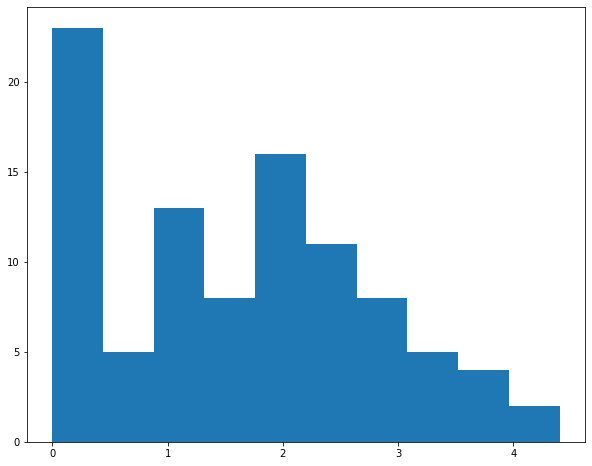

In [18]:
plt.hist(test_res)

In [19]:
np.mean(test_res)

1.578105263157895

# Notes: Cosinus Distance
    - Time to compute D: ~ 45 s
    - D and R plots are similar to lecture slides
    - Same movie reccomendation as in the lecture slides
    - Test Score 2.0884210526315785

# Notes: Euclidean Distance
    - Time to compute D: ~ 31 s (Faster)
    - D plot looks quite different 
    - Movie recommendations are also quite different
    - Test Score 1.578105263157895 (Worse)


## 4.2 Baseline Results
Implement and compare results of two very simple baseline methods 
* random recommendations: randomly recommend 5 movies (HINT user np.random sub-library to generate random movie IDs)
* always recommending the top 5 movies: HINT: need to find the IDs of the top 5 movies over all users first

### Test with 5 random movies

In [20]:
#use cosius distance again as default 
#again, implementation not efficient: better use lamda opperators (later in this course)
D_train=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            D_train[i,j]=CosineDist(R_train[:,i],R_train[:,j])


In [21]:
#Recommend only random movies!
def Score_byID(ID, D, Test):
    #print ("Hit Scores for: ", getNameByID(ID))
    #res_id = getTopN(ID,D)[::-1]
    # generate 5 random id's between 0 - 1682
    res_id = np.random.randint(R_test.shape[1], size = 5)
    res_title = getNameByID(getTopN(ID,D))[::-1]
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)
    

In [22]:
#testcode for random film IDs
res_id = np.random.randint(R_test.shape[1], size = 5)
res_id

array([916,  85, 754, 936, 929])

In [23]:
#only recommend random movies
#compute scores for all test users
def test_Score(D_train, R_test):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID(e,D_train, R_test[i])
            userScore+=av_score
        userScores.append(userScore/(5))
    return userScores

In [24]:
test_res=test_Score(D_train,R_test)

(array([44., 20., 14.,  4.,  4.,  2.,  2.,  2.,  0.,  3.]),
 array([0.   , 0.108, 0.216, 0.324, 0.432, 0.54 , 0.648, 0.756, 0.864,
        0.972, 1.08 ]),
 <BarContainer object of 10 artists>)

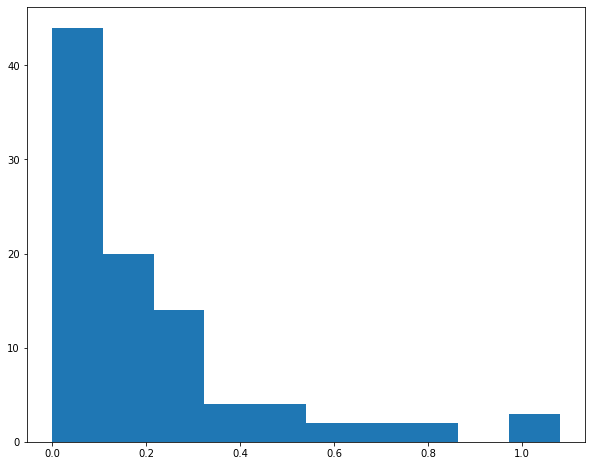

In [25]:
plt.hist(test_res)

In [26]:
np.mean(test_res)

0.19747368421052633

### Test with best 5 random movies

In [27]:
#Recommend only 5 best movies!
def Score_byID(ID, D, Test):
    column_sums = R_test.sum(axis=0)
    #print ("Hit Scores for: ", getNameByID(ID))
    #res_id = getTopN(ID,D)[::-1]
    # recommend best 5 movies
   #res_id = np.random.randint(R_test.shape[1]-1, size = 5)
    res_id = np.argsort(column_sums)[-5:]
    res_title = getNameByID(getTopN(ID,D))[::-1]
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)
    

In [28]:
#code to try try to get 5 best movies
column_sums = R_test.sum(axis=0)
getNameByID(np.argsort(column_sums)[-5:])

285    English Patient, The (1996)
180      Return of the Jedi (1983)
257                 Contact (1997)
99                    Fargo (1996)
49                Star Wars (1977)
Name: title, dtype: object

In [ ]:
#try to get 5 best movies (show 5 best movies of all persons)
#top5array = np.zeros((95,5))
#top1array = np.zeros((95,1))
#i = 0
#while i < 95:
#    top5array[i] = np.argsort(R_test[i])[-5:]
#    top1array[i] = np.argsort(R_test[i])[-1:]
#    i = i+1

#discarded

In [29]:
#compute scores for all test users
def test_Score(D_train, R_test):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID(e,D_train, R_test[i])
            userScore+=av_score
        userScores.append(userScore/(5))
    return userScores

In [30]:
test_res=test_Score(D_train,R_test)

(array([ 6.,  8., 14., 15.,  8., 11., 15.,  7.,  8.,  3.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

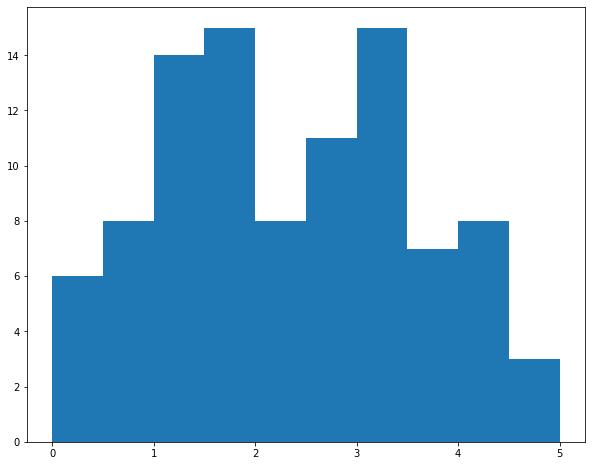

In [31]:
plt.hist(test_res)

In [32]:
np.mean(test_res)

2.2757894736842106

# Notes: Random IDs
    - Test Score 0.19747368421052633 (Teribble outcome, not expected!)

# Notes: Top5 Movies
    - Test Score 2.2757894736842106 (Better than regular recommender system, as expected!) 


## 4.3 SVD
Implement the SVD approach. Hints: 
* use numpy.linalg.svd()
* apply SVD on $D$
* plot the singular values and decide where to cut off the reconstruction
* reconstruct and evaluate $D'$


In [50]:
def Score_byID(ID, D, Test):
    #print ("Hit Scores for: ", getNameByID(ID))
    res_id = getTopN(ID,D)[::-1]
    res_title = getNameByID(getTopN(ID,D))[::-1]
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)
    

In [51]:
#compute scores for all test users
def test_Score(D_train, R_test):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID(e,D_train, R_test[i])
            userScore+=av_score
        userScores.append(userScore/(5))
    return userScores

In [52]:
#use SVD on D_train
U, S, V = np.linalg.svd(D_train)


In [53]:
U.shape, S.shape, V .shape

((1682, 1682), (1682,), (1682, 1682))

In [54]:
U

array([[-4.75742394e-02, -1.45472193e-02,  2.09003729e-02, ...,
        -8.85797774e-30,  1.15841211e-16, -1.31343006e-30],
       [-4.43932123e-02, -2.72217192e-02, -2.49386882e-03, ...,
        -9.90550322e-18, -2.70101470e-16,  6.03393969e-19],
       [-3.19997267e-02, -1.51706610e-02,  5.49809774e-03, ...,
        -1.21733460e-17,  3.96780341e-17, -6.41104184e-18],
       ...,
       [-9.09201131e-04,  4.83721421e-03, -1.53219642e-03, ...,
         8.50452843e-20,  5.21839208e-17, -2.12833592e-20],
       [-5.35566086e-03, -1.61931412e-03,  1.63072230e-03, ...,
        -1.50974601e-18, -1.57480174e-16,  5.46008183e-19],
       [-5.19421218e-03,  5.81152258e-04,  3.62005117e-03, ...,
        -1.27846396e-18,  1.11015926e-16,  1.86345788e-20]])

In [55]:
S

array([1.95138278e+02, 5.28057947e+01, 4.77509359e+01, ...,
       6.61206880e-17, 2.29600710e-17, 1.44749367e-18])

In [56]:
V

array([[-4.75742394e-02, -4.43932123e-02, -3.19997267e-02, ...,
        -9.09201131e-04, -5.35566086e-03, -5.19421218e-03],
       [-1.45472193e-02, -2.72217192e-02, -1.51706610e-02, ...,
         4.83721421e-03, -1.61931412e-03,  5.81152258e-04],
       [ 2.09003729e-02, -2.49386882e-03,  5.49809774e-03, ...,
        -1.53219642e-03,  1.63072230e-03,  3.62005117e-03],
       ...,
       [ 0.00000000e+00,  9.16712096e-18, -4.48513637e-18, ...,
        -1.85091831e-20, -4.18254201e-19,  8.86735511e-18],
       [ 0.00000000e+00,  1.46450803e-17,  4.42611360e-17, ...,
        -1.97936683e-17, -3.03355006e-17, -7.28441751e-17],
       [ 0.00000000e+00,  9.49010292e-18, -3.09284270e-17, ...,
         1.44614100e-18, -3.36916819e-18, -1.47539015e-17]])

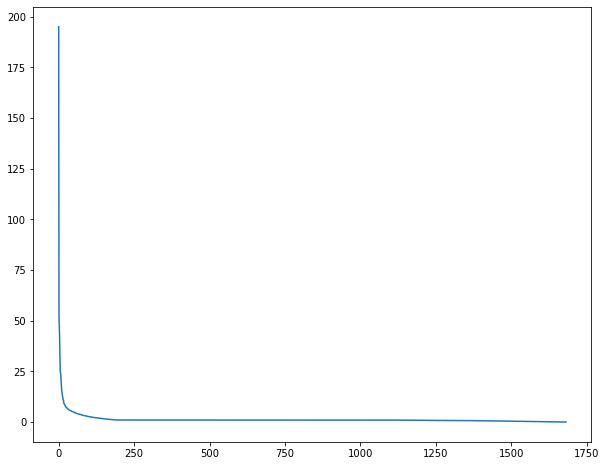

In [57]:
#plot of the singular values
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(S)

In [58]:
#reconstruction of D_train
D_train_reconstruction = np.dot(U[:,:1682]*S,V)
D_train_reconstruction.shape

(1682, 1682)

In [59]:
#reconstruction of D_train with loss
D_train_reconstruction_loss = np.dot(U[:,:2]*S[:2],V[:2,:])

In [60]:
#test with reconstructed
test_res=test_Score(D_train_reconstruction,R_test)

(array([ 3., 16.,  9., 15., 16., 14.,  9.,  6.,  4.,  3.]),
 array([0.44 , 0.852, 1.264, 1.676, 2.088, 2.5  , 2.912, 3.324, 3.736,
        4.148, 4.56 ]),
 <BarContainer object of 10 artists>)

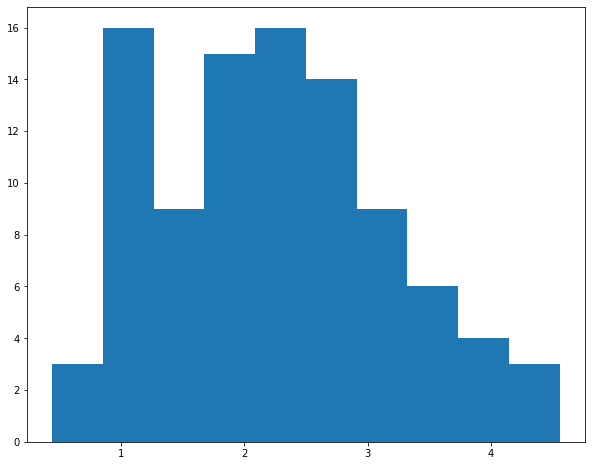

In [61]:
plt.hist(test_res)

In [62]:
np.mean(test_res)

2.2353684210526312

In [63]:
#test with reconstructed with loss
test_res=test_Score(D_train_reconstruction_loss,R_test)

(array([42.,  6.,  8.,  1.,  4.,  7., 10.,  5.,  9.,  3.]),
 array([0.   , 0.484, 0.968, 1.452, 1.936, 2.42 , 2.904, 3.388, 3.872,
        4.356, 4.84 ]),
 <BarContainer object of 10 artists>)

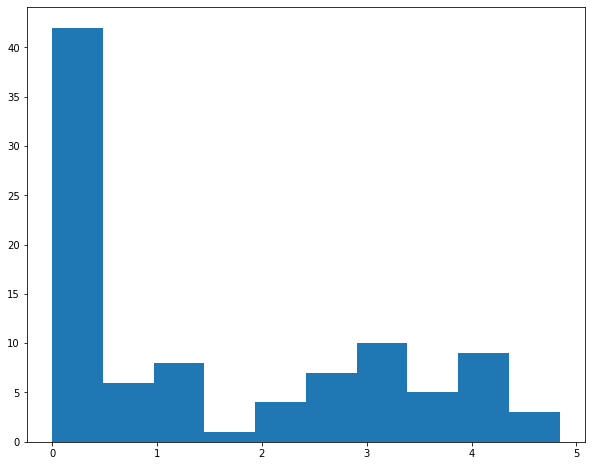

In [64]:
plt.hist(test_res)

In [65]:
np.mean(test_res)

1.5301052631578946

# Notes: Reconstructed D
    - Test Score 2.2353684210526312

# Notes: Reconstructed D with loss
    - Test Score 1.6631578947368422 